# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 어떤 성능지표를 기준으로 성능을 개선을 시도했고, 그러한 선택의 이유를 적어주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np

In [2]:
credit = pd.read_csv("assignment3_creditcard.csv")

In [3]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


## Logistic Regression 

In [4]:
X = credit.drop(["Class"], axis=1)
y = credit['Class']

In [5]:
y.value_counts()
# Fraud data가 상당히 적은 imbalanced dataset이다.

0    28432
1      246
Name: Class, dtype: int64

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from matplotlib import pyplot as plt
import seaborn as sns

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

## 1) Without SMOTE

In [78]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("\n<Train Set>")
print(y_train.value_counts())
print("\n<Test Set>")
print(y_test.value_counts())

(21508, 28) (7170, 28) (21508,) (7170,)

<Train Set>
0    21314
1      194
Name: Class, dtype: int64

<Test Set>
0    7118
1      52
Name: Class, dtype: int64


In [81]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print("Train Score\t{}".format(classifier.score(X_train, y_train)))
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)
print("Test Score\t\t{}".format(classifier.score(X_test, y_test)))

Train Score	0.9976752836153989
Test Score		0.997907949790795


             precision    recall  f1-score   support

          0       1.00      1.00      1.00      7118
          1       0.91      0.79      0.85        52

avg / total       1.00      1.00      1.00      7170



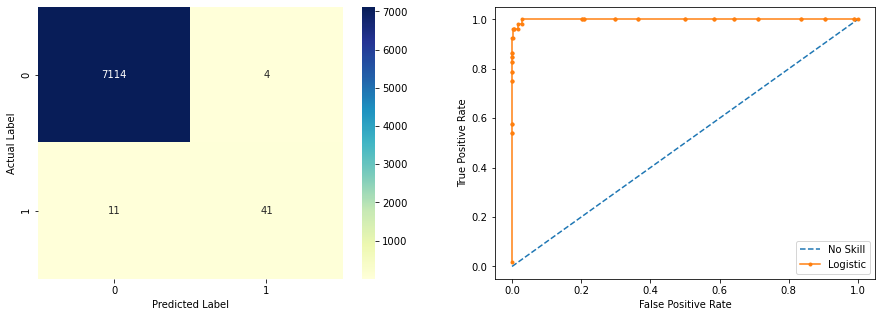

In [82]:
# print("F1 Score\t{}".format(f1_score(y_test, y_pred)))
# print("Recall Score\t{}".format(recall_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (15,5))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', ax = axes[0])
axes[0].set_ylabel('Actual Label')
axes[0].set_xlabel('Predicted Label')

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_proba[:, 1])
 
# plot the roc curve for the model
axes[1].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
axes[1].plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
 
# axis labels
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
 
# show the legend
axes[1].legend()
 
# show the plot
plt.show()

## 2) With SMOTE

In [79]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
X_train_, y_train_ = smt.fit_sample(X_train, y_train)
print("<Train Set>")
print(pd.Series(y_train_).value_counts())
print("\n<Test Set>")
print(y_test.value_counts())

<Train Set>
1    21314
0    21314
dtype: int64

<Test Set>
0    7118
1      52
Name: Class, dtype: int64


data가 imbalanced되어 있으므로 train 데이터에 대해서 data augmentation을 해준다. SMOTE를 사용하여 Fraud data에 대해 oversampling을 해주어 class의 균형을 맞추어 준다.

In [84]:
classifier = LogisticRegression()
classifier.fit(X_train_, y_train_)
print("Train Score\t{}".format(classifier.score(X_train_, y_train_)))
y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)
print("Test Score\t\t{}".format(classifier.score(X_test, y_test)))

Train Score	0.9487191517312564
Test Score		0.9701534170153417


             precision    recall  f1-score   support

          0       1.00      0.97      0.98      7118
          1       0.20      1.00      0.33        52

avg / total       0.99      0.97      0.98      7170



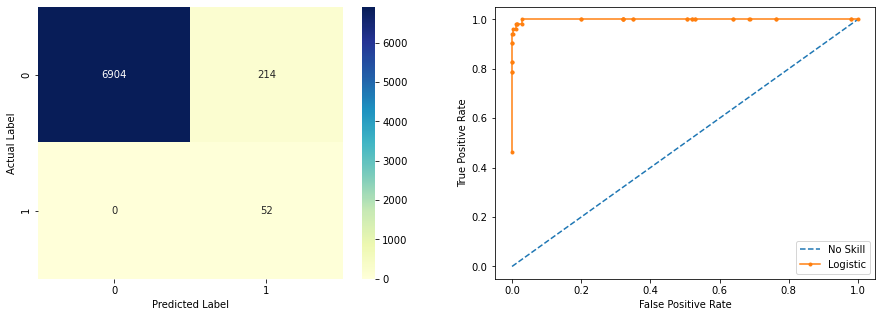

In [85]:
# print("F1 Score\t{}".format(f1_score(y_test, y_pred)))
# print("Recall Score\t{}".format(recall_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize= (15,5))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g', ax = axes[0])
axes[0].set_ylabel('Actual Label')
axes[0].set_xlabel('Predicted Label')

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_proba[:, 1])
 
# plot the roc curve for the model
axes[1].plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
axes[1].plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
 
# axis labels
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
 
# show the legend
axes[1].legend()
 
# show the plot
plt.show()

Data augmentation을 사용하지 않은 경우 F1 score, accuracy 등이 높게 나타난다. 그러나 이상 거래 탐지에서 중요한 것은 FP이다. 실제로 사기거래인데, 정상거래로 탐지하는 경우가 최악의 경우이다. 따라서 SMOTE를 사용한 경우가 더 FP를 줄였기 때문에 더 효과적임을 알 수 있다.